In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, random_split, DataLoader
iris = pd.read_csv (r'iris_flowers.csv')

ModuleNotFoundError: No module named 'torch'

In [42]:
iriswithoutc = iris.drop(['class'], axis = 1)
iriswithoutc

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
classes = ['iris_setosa','iris_versicolor','iris_virginica']
targ = pd.DataFrame(list(zip(classes)),columns=['classes'])
target = pd.get_dummies(targ.classes)
print(target.head())

   iris_setosa  iris_versicolor  iris_virginica
0            1                0               0
1            0                1               0
2            0                0               1


In [44]:
#irisss = iris.drop(['sepal_length','sepal_width','petal_length',' petal_width'], axis = 1)
#irisss[78]
newdf = np.array(iriswithoutc)
newtarget = np.array(target)
max_newdf = np.amax(newdf, axis=0)
min_newdf = np.amin(newdf, axis=0)
norminput = (newdf - min_newdf)/(max_newdf - min_newdf)

In [45]:
num = 0
outputarr = []
for num in range (0, 50):
  outputarr.append(newtarget[0])
for num in range (50, 100):
  outputarr.append(newtarget[1])
for num in range (100, 150):
  outputarr.append(newtarget[2])

len(outputarr)

150

In [46]:
noutputarray = np.array(outputarr)
norminput =  np.array(norminput)

In [47]:
noutputarray

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [48]:
norminput

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [49]:
#Converting Data to tensors
iris_input = torch.from_numpy(norminput).float()
tensorTarget = torch.from_numpy(noutputarray).float()

In [50]:
tensorTarget

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [51]:
iris_input

tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.0833, 0.6667, 0.0000, 0.0417],
        [0.2222, 0.5417, 0.1186, 0

In [53]:
tds = TensorDataset(iris_input, tensorTarget)
train_ds, val_ds, test_ds = random_split(tds, [90, 30, 30])
len(train_ds), len(val_ds), len(test_ds)

(90, 30, 30)

In [54]:
train_ds

In [55]:
#Define Model
input_size = 4
num_classes = 3
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
model.parameters

torch.Size([3, 4])


<bound method Module.parameters of Linear(in_features=4, out_features=3, bias=True)>

In [56]:
class irisModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 4)
        out = self.linear(xb)
        return out
    
model = irisModel()

In [57]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([3, 4]) torch.Size([3])


[Parameter containing:
 tensor([[ 0.2292,  0.1737, -0.0305, -0.1012],
         [-0.0812,  0.3357, -0.0479, -0.3720],
         [-0.2171, -0.1918, -0.4526, -0.4395]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2148,  0.0460, -0.2751], requires_grad=True)]

In [58]:

train_loader = DataLoader(train_ds)
val_loader = DataLoader(val_ds)

In [59]:
for flower, product in train_loader:
  outputs = model(flower)

In [60]:
print(outputs.shape)
print(outputs)

torch.Size([1, 3])
tensor([[ 0.3198, -0.1375, -1.0305]], grad_fn=<AddmmBackward>)


In [61]:
#outputs = outputs.float()
#outputs.type()

In [62]:
import torch.nn.functional as F

In [63]:
#Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

#View Sample Probabilities
print("Sample Probabilities:", probs.data)
#Sum Probabilities
print("Probability Sum: ", torch.sum(probs[0]).item())

Sample Probabilities: tensor([[0.5285, 0.3345, 0.1370]])
Probability Sum:  1.0


In [64]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
if (preds == 0):
  Output_class = "iris_setosa"
elif (preds == 1):
  Output_class = "iris_versicolor"
else:
  Output_class = "iris_virginica"

print(Output_class)

tensor([0])
iris_setosa


In [65]:
max_product, max_index = torch.max(product, dim = 1)
print(max_index)
if (max_index == 0):
  Actual_class = "iris_setosa"
elif (max_index == 1):
  Actual_class = "iris_versicolor"
else:
  Actual_class = "iris_virginica"

print(Actual_class)

tensor([2])
iris_virginica


In [66]:
#Loss Function

def accuracy(outputs, max_index):
  _, preds = torch.max(outputs, dim = 1)
  d = len(preds)
  return torch.tensor(torch.sum(preds == max_index).item()) / d
  #return torch.tensor(torch.sum(preds == max_index).item() / len(preds))

In [67]:
accuracy(outputs, max_index)

tensor(0)

In [76]:
print(max_index.dtype)

torch.int64


In [77]:
print(outputs.dtype)

torch.float32


In [68]:
loss_fn = F.cross_entropy

In [69]:
# Loss for current batch of data
loss = loss_fn(outputs, max_index)
print(loss)

tensor(1.9881, grad_fn=<NllLossBackward>)


In [70]:
class irisModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 4)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        flower, product = batch 
        out = self(flower)                  # Generate predictions
        loss = F.cross_entropy(out, max_index) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        flower, product = batch 
        out = self(flower)                    # Generate predictions
        loss = F.cross_entropy(out, max_index)   # Calculate loss
        acc = accuracy(out, max_index)           # Calculate accuracy
        acc = acc.float()
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    

model = irisModel()

In [71]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [72]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.0, 'val_loss': 1.330264925956726}

In [73]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2005, val_acc: 0.0000
Epoch [1], val_loss: 1.0841, val_acc: 0.5667
Epoch [2], val_loss: 0.9806, val_acc: 0.8333
Epoch [3], val_loss: 0.8889, val_acc: 1.0000
Epoch [4], val_loss: 0.8081, val_acc: 1.0000


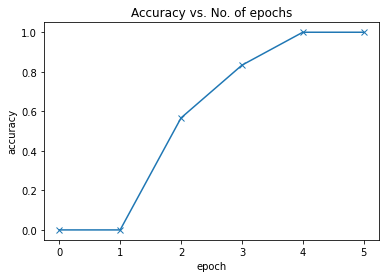

In [74]:
history = [result0] + history1 
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');